In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
pd.set_option('display.max_info_columns', 50)


In [4]:
df1_original = pd.read_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/crudos/bank-additional.csv',index_col=0)
print(f'El número de filas es {df1_original.shape[0]} y el número de columnas es de {df1_original.shape[1]}')

El número de filas es 43000 y el número de columnas es de 23


In [5]:
df1_original.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [6]:
df2_original = pd.read_excel(
    "C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/crudos/customer-details.xlsx",
    index_col=0
)

In [7]:
df2_original.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [8]:
print(f'el numero de duplicados es {df1_original.duplicated().sum()}')

el numero de duplicados es 0


In [9]:
print(f'el numero de duplicados es {df2_original.duplicated().sum()}')

el numero de duplicados es 0


In [10]:

df1_original.isnull().sum()


age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [11]:
df1_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [12]:
df2_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             20115 non-null  int64         
 1   Kidhome            20115 non-null  int64         
 2   Teenhome           20115 non-null  int64         
 3   Dt_Customer        20115 non-null  datetime64[ns]
 4   NumWebVisitsMonth  20115 non-null  int64         
 5   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


1.TRANSFORMACION Y LIMPIEZA DE DATOS

In [13]:
#hago copia para por si tengo que trabajar con datos y la lio no perder los originales
df1 = df1_original.copy()
df2 = df2_original.copy() 

In [14]:
#pongo las columnas del df1 en mayusculas para que coincidan con las del df2
nuevas_columnas = [col.replace('-', '_').title().replace(' ', '_') for col in df1.columns]
df1.columns = nuevas_columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             37880 non-null  float64
 1   Job             42655 non-null  object 
 2   Marital         42915 non-null  object 
 3   Education       41193 non-null  object 
 4   Default         34019 non-null  float64
 5   Housing         41974 non-null  float64
 6   Loan            41974 non-null  float64
 7   Contact         43000 non-null  object 
 8   Duration        43000 non-null  int64  
 9   Campaign        43000 non-null  int64  
 10  Pdays           43000 non-null  int64  
 11  Previous        43000 non-null  int64  
 12  Poutcome        43000 non-null  object 
 13  Emp.Var.Rate    43000 non-null  float64
 14  Cons.Price.Idx  42529 non-null  object 
 15  Cons.Conf.Idx   43000 non-null  object 
 16  Euribor3M       33744 non-null  object 
 17  Nr.Employed     43000 non-null  obje

In [15]:
#primero cambio el indice de df1 para que sea el mismo que df2 para luego hacer merge más adelante
df1.rename(columns={'Id_': 'ID'}, inplace=True)

In [16]:
#convierto las columnas que deberian ser numericas y no lo son por tener comas en los decimales
df1['Cons.Conf.Idx'] = df1['Cons.Conf.Idx'].astype(str).str.replace(',', '.').astype(float)
df1['Euribor3M'] = df1['Euribor3M'].astype(str).str.replace(',', '.').astype(float)
df1['Cons.Price.Idx'] = df1['Cons.Price.Idx'].astype(str).str.replace(',', '.').astype(float)
df1['Nr.Employed'] = df1['Nr.Employed'].astype(str).str.replace(',', '.').astype(float)

In [17]:
#date a datetime por si se quiere trabajar con fechas
meses = {
    'enero':'Jan', 'febrero':'Feb', 'marzo':'Mar', 'abril':'Apr', 'mayo':'May', 'junio':'Jun',
    'julio':'Jul', 'agosto':'Aug', 'septiembre':'Sep', 'octubre':'Oct', 'noviembre':'Nov', 'diciembre':'Dec'
}
df1.replace({'Date': meses},regex=True , inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

In [18]:
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [19]:
#miro valores unicos por si hay algo mal escrito o que pueda ser nulo
for col in df1.columns:
    print(f'Valores únicos en la columna {col}: {df1[col].unique()}\n')

Valores únicos en la columna Age: [nan 57. 37. 40. 56. 45. 59. 24. 25. 41. 29. 35. 54. 50. 39. 30. 55. 46.
 49. 34. 52. 58. 32. 38. 44. 42. 60. 51. 48. 47. 31. 33. 53. 43. 36. 28.
 27. 26. 22. 20. 23. 21. 61. 19. 18. 70. 66. 76. 67. 73. 88. 95. 68. 75.
 63. 80. 62. 72. 82. 64. 71. 69. 78. 65. 85. 79. 77. 83. 81. 74. 17. 87.
 91. 86. 98. 94. 84. 92. 89.]

Valores únicos en la columna Job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

Valores únicos en la columna Marital: ['MARRIED' 'SINGLE' 'DIVORCED' nan]

Valores únicos en la columna Education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

Valores únicos en la columna Default: [ 0. nan  1.]

Valores únicos en la columna Housing: [ 0.  1. nan]

Valores únicos en la columna Loan: [ 0.  1. nan]

Valores únicos en la columna Contact: ['telephone' 'cellular']

Valores únicos en la

In [20]:
#En Job, admin. puede dar problemas por el punto, lo quito
df1['Job'] = df1['Job'].str.replace('.', '', regex=False)
df1['Job'].unique()


array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

-Posibles Inconsistencias

In [21]:
df1[df1['Age'] < 0]
#no hay edades negativas

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID


In [22]:
#reviso la edad + de 90 años por si hay muchos pueda ser un pico raro en la visualizacion. Si no hay muchos no me preocupa
df1[df1['Age'] > 90]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
27826,95.0,retired,DIVORCED,basic.6y,0.0,0.0,0.0,cellular,85,1,999,0,NONEXISTENT,-1.8,92.843,-50.0,NaN,5099.1,no,2015-12-06,44.145,-74.197,4172104e-6c75-4979-985d-42a3dcd2992d
38022,91.0,retired,MARRIED,university.degree,0.0,1.0,1.0,cellular,837,1,999,2,FAILURE,-3.4,92.379,-29.8,0.781,5017.5,no,2017-03-31,24.554,-113.593,4b3f1be2-5ee1-4089-989d-090815db68ab
38032,91.0,retired,MARRIED,university.degree,0.0,0.0,1.0,cellular,223,2,999,0,NONEXISTENT,-3.4,92.379,-29.8,0.781,5017.5,no,2019-08-15,35.015,-115.515,3b8f686e-bb03-46a2-8047-1ebc3ada3e2e
38452,98.0,retired,MARRIED,basic.4y,NaN,1.0,0.0,cellular,476,1,2,2,SUCCESS,-3.4,92.431,-26.9,0.730,5017.5,yes,2018-11-30,46.293,-81.545,a76c3431-b56f-4dde-851b-d3f129b17a2b
38455,98.0,retired,MARRIED,basic.4y,NaN,1.0,0.0,cellular,272,2,999,0,NONEXISTENT,-3.4,92.431,-26.9,0.730,5017.5,yes,2019-04-14,43.037,-114.538,03afdfda-1529-4927-80dc-3ce9e2db1957
38921,94.0,retired,MARRIED,basic.9y,0.0,0.0,0.0,cellular,134,1,999,1,FAILURE,-3.4,92.649,-30.1,0.716,5017.5,no,2015-08-18,45.670,-66.975,476c76b6-d9ec-428b-94e6-43a000285ca6
39655,92.0,retired,MARRIED,NaN,0.0,1.0,0.0,cellular,271,1,6,2,SUCCESS,-1.8,93.876,-40.0,0.683,5008.7,no,2017-08-04,28.505,-101.702,b5cdbc32-d7cc-4615-8ee1-2b8710383193
39734,92.0,retired,DIVORCED,NaN,NaN,0.0,0.0,cellular,405,3,999,1,FAILURE,-1.8,93.876,-40.0,0.697,5008.7,yes,2019-10-02,32.301,-104.957,e3b3a844-171f-49c4-ad49-144ca04505df
40450,92.0,retired,MARRIED,NaN,0.0,0.0,1.0,cellular,1064,1,3,1,SUCCESS,-1.7,94.027,-38.3,0.904,4991.6,yes,2015-07-08,47.801,-117.565,2bc1c176-d490-4d0a-b29f-de0c40019a48
40469,92.0,retired,MARRIED,NaN,0.0,0.0,1.0,cellular,370,1,3,4,SUCCESS,-1.7,94.027,-38.3,0.903,4991.6,yes,2015-11-10,38.790,-108.461,e1ad89d4-abae-469e-911f-0284908cd437


In [23]:
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             20115 non-null  int64         
 1   Kidhome            20115 non-null  int64         
 2   Teenhome           20115 non-null  int64         
 3   Dt_Customer        20115 non-null  datetime64[ns]
 4   NumWebVisitsMonth  20115 non-null  int64         
 5   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [25]:
df2.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [26]:
#miro valores unicos por si hay algo mal escrito o que pueda ser nulo
for col in df2.columns:
    print(f'Valores únicos en la columna {col}: {df2[col].unique()}\n')

Valores únicos en la columna Income: [161770  85477 147233 ... 135009   8486 144419]

Valores únicos en la columna Kidhome: [1 0 2]

Valores únicos en la columna Teenhome: [0 1 2]

Valores únicos en la columna Dt_Customer: <DatetimeArray>
['2012-04-04 00:00:00', '2012-12-30 00:00:00', '2012-02-02 00:00:00',
 '2012-12-21 00:00:00', '2012-06-20 00:00:00', '2012-01-24 00:00:00',
 '2012-08-15 00:00:00', '2012-12-10 00:00:00', '2012-08-22 00:00:00',
 '2012-02-09 00:00:00',
 ...
 '2012-04-18 00:00:00', '2012-12-03 00:00:00', '2012-07-05 00:00:00',
 '2012-08-25 00:00:00', '2012-06-26 00:00:00', '2012-12-07 00:00:00',
 '2012-01-09 00:00:00', '2012-06-24 00:00:00', '2012-04-06 00:00:00',
 '2012-09-24 00:00:00']
Length: 366, dtype: datetime64[ns]

Valores únicos en la columna NumWebVisitsMonth: [29  7  5 20 26  3 21 18  9 30 32 27 15 28  2 17 12  1 25 10 14 24 13 11
  8 23 16  4 31 19 22  6]

Valores únicos en la columna ID: ['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672

In [27]:
df2[df2['Income'] < 0]
#no hay negativos

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID


In [28]:
#guardo los df limpios
df1.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/df1_limpio.csv',index=False)
df2.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/df2_limpio.csv',index=False)

2.GESTION DE NULOS

In [29]:
df1['Age'].isna().sum()


np.int64(5120)

In [30]:
missing_summary = df1.isna().sum().reset_index()
missing_summary.columns = ['Column', 'MissingValues']
missing_summary = missing_summary[missing_summary['MissingValues'] > 0].sort_values(by='MissingValues', ascending=False)

print(missing_summary)


            Column  MissingValues
16       Euribor3M           9256
4          Default           8981
0              Age           5120
3        Education           1807
6             Loan           1026
5          Housing           1026
14  Cons.Price.Idx            471
1              Job            345
19            Date            248
2          Marital             85


In [31]:
df1.isnull().sum()

Age               5120
Job                345
Marital             85
Education         1807
Default           8981
Housing           1026
Loan              1026
Contact              0
Duration             0
Campaign             0
Pdays                0
Previous             0
Poutcome             0
Emp.Var.Rate         0
Cons.Price.Idx     471
Cons.Conf.Idx        0
Euribor3M         9256
Nr.Employed          0
Y                    0
Date               248
Latitude             0
Longitude            0
ID                   0
dtype: int64

In [32]:
df1_nulos = pd.DataFrame((df1.isnull().sum()/df1.shape[0])*100, columns=['Nulos'])
print(df1_nulos)

                    Nulos
Age             11.906977
Job              0.802326
Marital          0.197674
Education        4.202326
Default         20.886047
Housing          2.386047
Loan             2.386047
Contact          0.000000
Duration         0.000000
Campaign         0.000000
Pdays            0.000000
Previous         0.000000
Poutcome         0.000000
Emp.Var.Rate     0.000000
Cons.Price.Idx   1.095349
Cons.Conf.Idx    0.000000
Euribor3M       21.525581
Nr.Employed      0.000000
Y                0.000000
Date             0.576744
Latitude         0.000000
Longitude        0.000000
ID               0.000000


In [33]:
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [34]:
#intervengo nulos en age, default y euribor
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [35]:
#Age: Lo más logico es con la mediana, ya que la media puede estar sesgada por edades muy altas o muy bajas
mediana_age = df1['Age'].median()
df1['Age'] = df1['Age'].fillna(mediana_age)

In [36]:
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [37]:
#default: lo mas logico es con la moda, ya que es categorica
moda_default = df1['Default'].mode()[0]
df1['Default'] = df1['Default'].fillna(moda_default)
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [38]:
#euribor: lo mas logico es con la mediana ya que fluctua mucho y tiene picos raros
mediana_euribor = df1['Euribor3M'].median() 
df1['Euribor3M'] = df1['Euribor3M'].fillna(mediana_euribor)
df1.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [39]:
#compruebo que ya no hay nulos
df1.isnull().sum()  


Age                  0
Job                345
Marital             85
Education         1807
Default              0
Housing           1026
Loan              1026
Contact              0
Duration             0
Campaign             0
Pdays                0
Previous             0
Poutcome             0
Emp.Var.Rate         0
Cons.Price.Idx     471
Cons.Conf.Idx        0
Euribor3M            0
Nr.Employed          0
Y                    0
Date               248
Latitude             0
Longitude            0
ID                   0
dtype: int64

In [40]:
#gestiono education unknown
df1['Education'].value_counts()


Education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

In [41]:
df1['Education'] = df1['Education'].fillna('unknown')


In [42]:
#gestiono housin y loan con la moda porque tienen pocos nulos y no habria mucha variabilidad
moda_housing = df1['Housing'].mode()[0]
df1['Housing'] = df1['Housing'].fillna(moda_housing)
moda_loan = df1['Loan'].mode()[0]
df1['Loan'] = df1['Loan'].fillna(moda_loan)


In [43]:
#con marital hago lo mismo que con housing y loan
moda_marital = df1['Marital'].mode()[0] 
df1['Marital'] = df1['Marital'].fillna(moda_marital)

In [44]:
#con job lo califico como unknown y se crea otra categoria
df1['Job'] = df1['Job'].fillna('unknown')

In [45]:
df1.sample()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID
7204,41.0,blue-collar,MARRIED,basic.6y,0.0,0.0,0.0,telephone,74,2,999,0,NONEXISTENT,1.1,93.994,-36.4,4.86,5191.0,no,2018-04-25,36.724,-97.986,dacbb759-43f3-42c7-8d49-de431a55dfcb


In [46]:
#Cons.Price.Idx (1.09% nulos) y Date (0.57% nulos) no los toco porque no tienen mucho sentido rellenarlos y no son muchos nulos

In [47]:
df2.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [48]:
df1.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/df1_limpio_sinnulos.csv',index=False)
df2.to_csv('C:/Users/Maria/OneDrive/Escritorio/MIs Cosas/Datapython/Data/df2_limpio_sinnulos.csv',index=False)

3.Analisis descriptivo y visualizacion

La media de edad es: 39
La mediana de edad es: 38


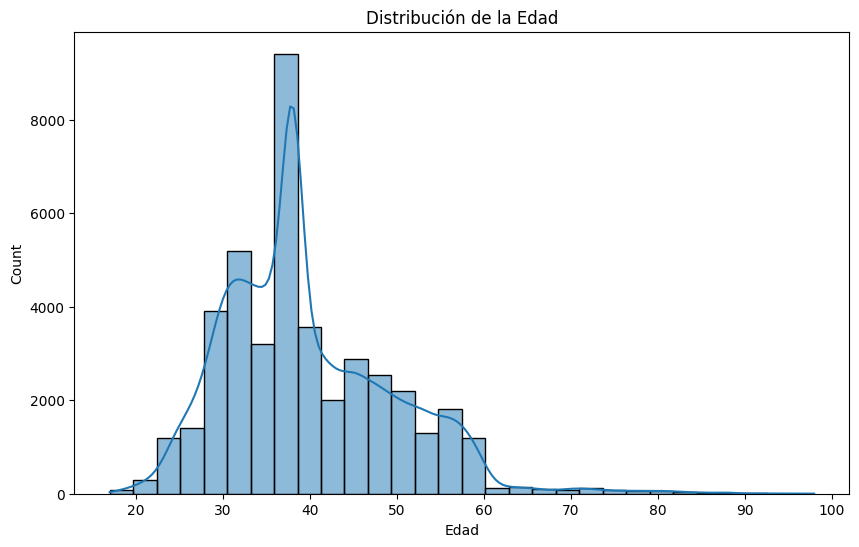

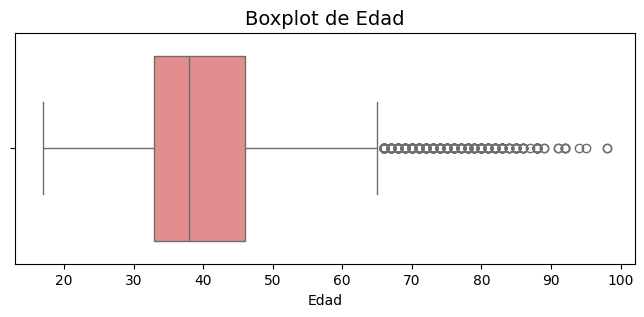

In [49]:
#media de edad
media_edad = df1['Age'].mean()
print(f'La media de edad es: {int(media_edad)}')
mediana_edad = df1['Age'].median()
print(f'La mediana de edad es: {int(mediana_edad)}')
#Distribución de la edad con histograma o boxplot.  Segmentar por variable objetivo (y/n)

plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')  
plt.figure(figsize=(8,3))
sns.boxplot(x=df1['Age'], color="lightcoral")
plt.title("Boxplot de Edad", fontsize=14)
plt.xlabel("Edad")
plt.show()


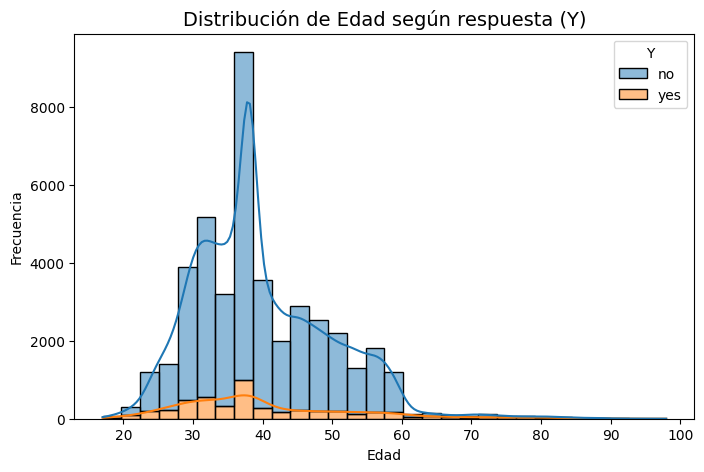

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data=df1, x="Age", hue="Y", bins=30, kde=True, multiple="stack")
plt.title("Distribución de Edad según respuesta (Y)", fontsize=14)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


In [51]:
#cuento los valores que hay en campaign
df1['Campaign'].value_counts()

Campaign
1     18404
2     11048
3      5584
4      2777
5      1658
6      1025
7       658
8       418
9       289
10      236
11      183
12      130
13       94
14       73
17       61
16       51
15       51
18       34
20       30
19       26
21       26
23       20
24       18
22       17
27       11
29       10
30       10
28        8
31        8
25        8
26        8
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64

In [52]:
success_rate = df1.groupby('Campaign')['Y'].value_counts(normalize=True).unstack()['yes'] * 100
print(success_rate)


Campaign
1     13.018909
2     11.477190
3     10.816619
4      9.290601
5      7.418577
6      7.707317
7      6.079027
8      4.784689
9      5.536332
10     5.508475
11     6.557377
12     2.307692
13     4.255319
14     1.369863
15     3.921569
16          NaN
17     6.557377
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23     5.000000
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
37          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
56          NaN
Name: yes, dtype: float64


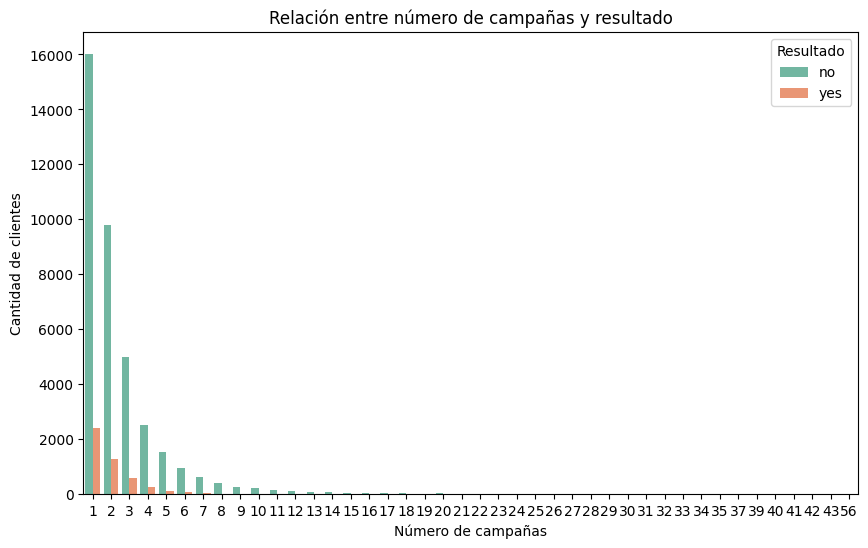

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Campaign', hue='Y', palette="Set2")
plt.title("Relación entre número de campañas y resultado")
plt.xlabel("Número de campañas")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Resultado")
plt.show()

In [54]:
#ahora miro el porcentaje de exito por numero de campañas
success_rate = df1.groupby('Campaign')['Y'].value_counts(normalize=True).unstack()['yes'] * 100

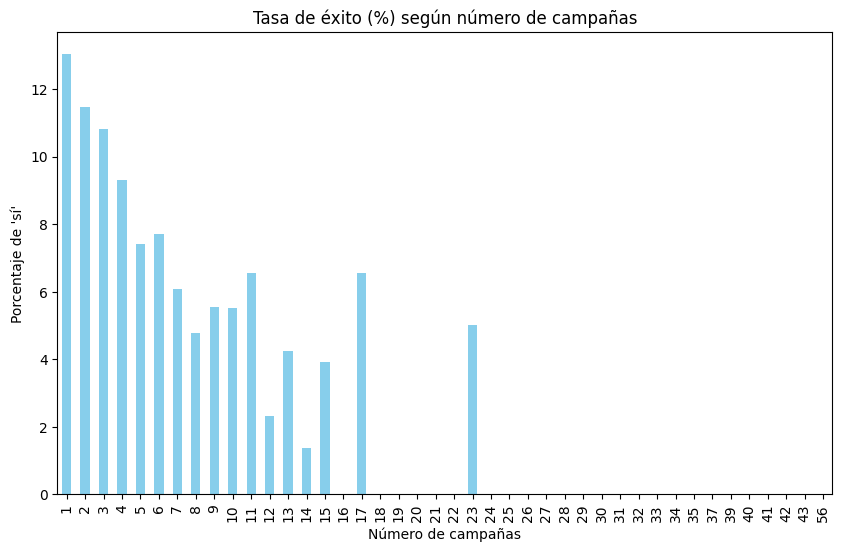

In [55]:
plt.figure(figsize=(10,6))
success_rate.plot(kind='bar', color="skyblue")
plt.title("Tasa de éxito (%) según número de campañas")
plt.xlabel("Número de campañas")
plt.ylabel("Porcentaje de 'sí'")
plt.show()


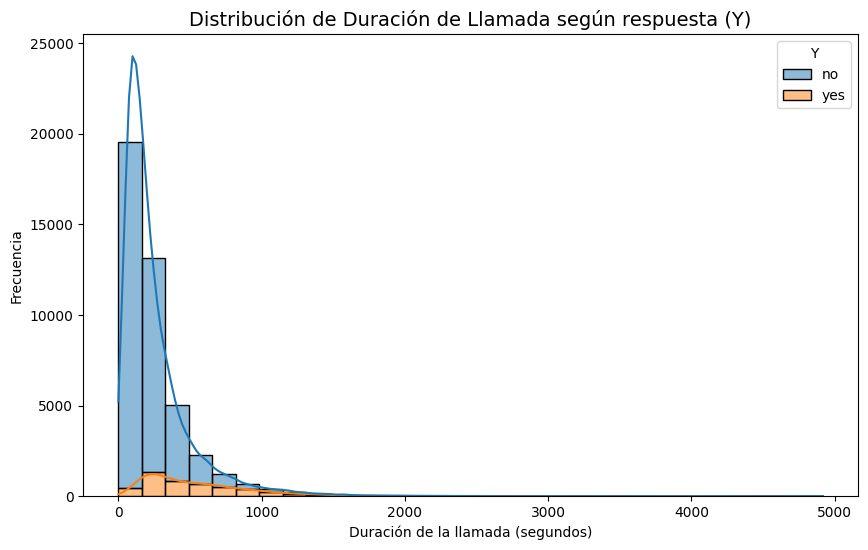

In [82]:
#ahora la duracion de la llamada y tasa de exito con y
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='Duration', hue='Y', bins=30, kde=True, multiple="stack")
plt.title("Distribución de Duración de Llamada según respuesta (Y)", fontsize=14)
plt.xlabel("Duración de la llamada (segundos)") 
plt.ylabel("Frecuencia")
plt.show()



In [56]:
#ahora cuantos estan casados
df1['Marital'].value_counts()

Marital
MARRIED     26084
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64

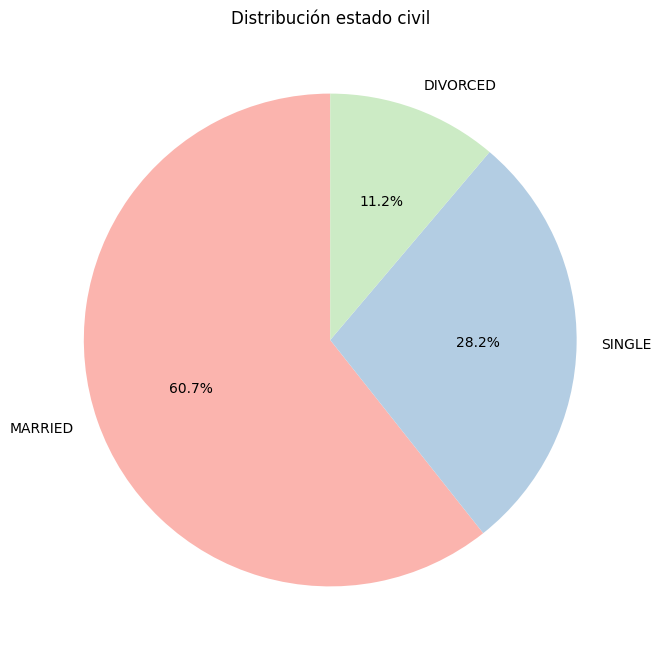

In [57]:
plt.figure(figsize=(8,8))
df1['Marital'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,       
    colors=plt.cm.Pastel1.colors
)
plt.title("Distribución estado civil")
plt.ylabel("")  # elimina etiqueta del eje
plt.show()


Marital
DIVORCED    10.184993
MARRIED     10.228493
SINGLE      13.928129
Name: yes, dtype: float64


Text(0, 0.5, "Porcentaje de 'sí'")

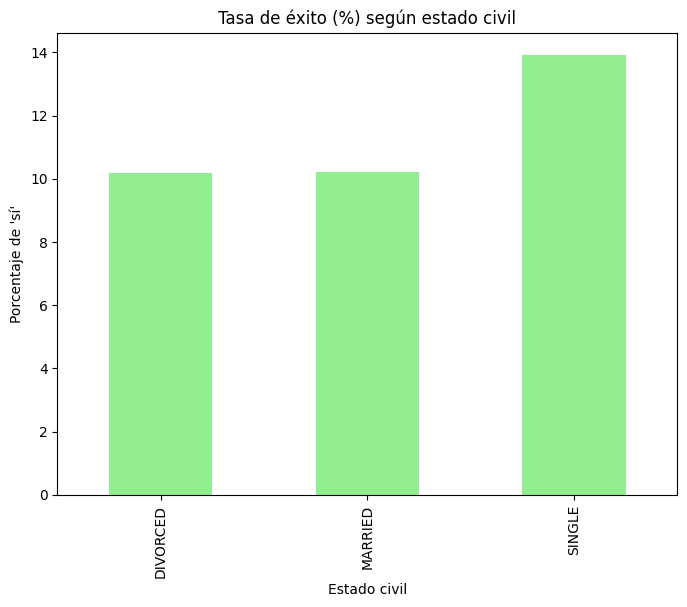

In [58]:
#ahora el porcentaje de si por estado civil y lo imprimo    
marital_success_rate = df1.groupby('Marital')['Y'].value_counts(normalize=True).unstack()['yes'] * 100
print(marital_success_rate)
plt.figure(figsize=(8,6))
marital_success_rate.plot(kind='bar', color="lightgreen")       
plt.title("Tasa de éxito (%) según estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Porcentaje de 'sí'")    

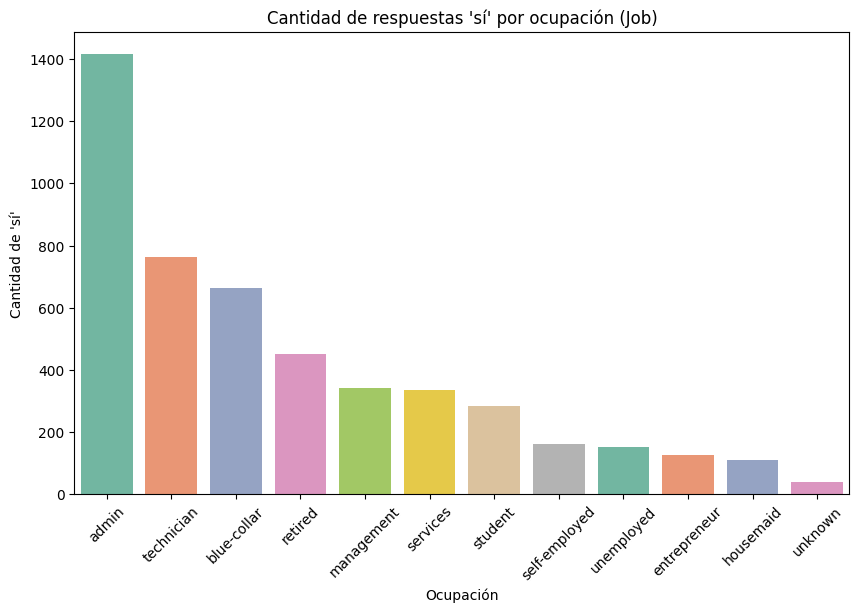

In [59]:

job_yes_counts = df1[df1["Y"] == "yes"]["Job"].value_counts().reset_index()
job_yes_counts.columns = ["Job", "Count"]

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=job_yes_counts, x="Job", y="Count", hue="Job", legend=False, palette="Set2")
plt.title("Cantidad de respuestas 'sí' por ocupación (Job)")
plt.ylabel("Cantidad de 'sí'")
plt.xlabel("Ocupación")
plt.xticks(rotation=45)
plt.show()



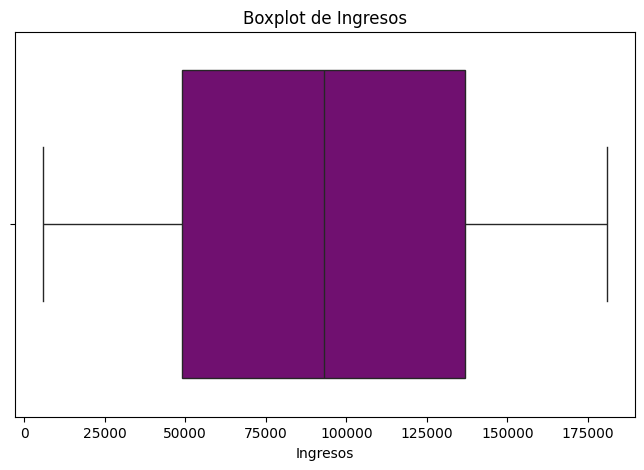

In [ ]:
#ahora en df2 

#la distribucion de income
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['Income'], color='purple')
plt.title('Boxplot de Ingresos')
plt.xlabel('Ingresos')
plt.show()


In [61]:
#como no hay outliers hago la media y la mediana
media_income = df2['Income'].mean() 
mediana_income = df2['Income'].median()
print(f'La media de ingresos es: {int(media_income)}')
print(f'La mediana de ingresos es: {int(mediana_income)}')

La media de ingresos es: 93087
La mediana de ingresos es: 92962


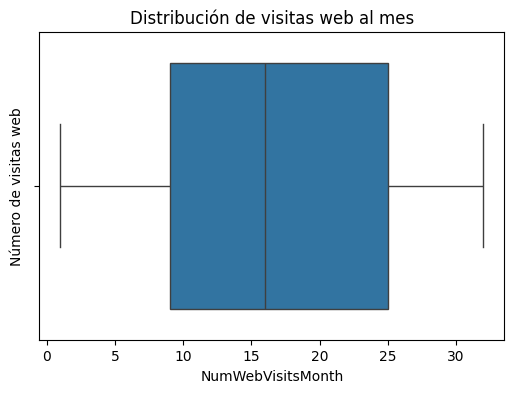

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df2['NumWebVisitsMonth'])
plt.title('Distribución de visitas web al mes')
plt.ylabel('Número de visitas web')
plt.show()


In [63]:
#como no hay outliers hago tambien la media
media_visitas = df2['NumWebVisitsMonth'].mean()
print(f'La media de visitas web al mes es: {int(media_visitas)}')

La media de visitas web al mes es: 16


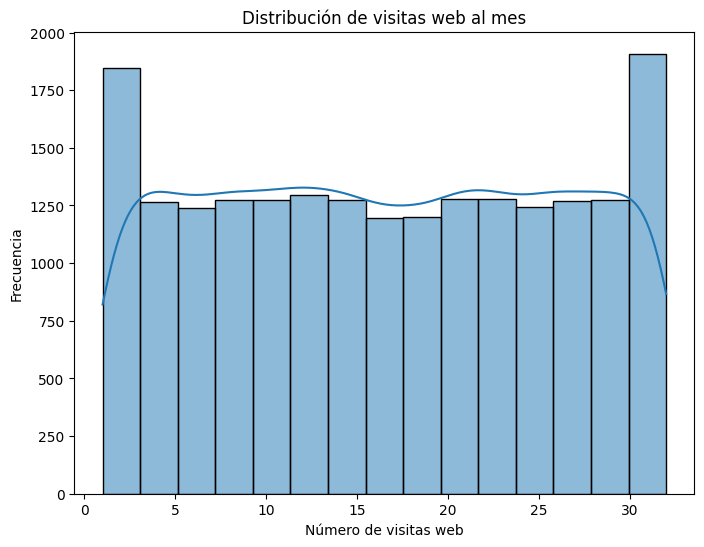

In [64]:
plt.figure(figsize=(8,6))
sns.histplot(df2['NumWebVisitsMonth'], bins=15, kde=True) 
plt.title('Distribución de visitas web al mes')
plt.xlabel('Número de visitas web')
plt.ylabel('Frecuencia')
plt.show()

In [65]:
# uno los dos df para ver si hay alguna relacion entre variables de ambos


df = pd.merge(df1, df2, on='ID', how='left')
df.head()   

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,Nr.Employed,Y,Date,Latitude,Longitude,ID,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,2012-04-04,29.0
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,2012-12-30,7.0
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,2012-02-02,5.0
3,40.0,admin,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,2012-12-21,29.0
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,2012-06-20,20.0


In [66]:
print("Columnas df1:", df1.columns)
print("Columnas df2:", df2.columns)


Columnas df1: Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan',
       'Contact', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome',
       'Emp.Var.Rate', 'Cons.Price.Idx', 'Cons.Conf.Idx', 'Euribor3M',
       'Nr.Employed', 'Y', 'Date', 'Latitude', 'Longitude', 'ID'],
      dtype='object')
Columnas df2: Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


C:\Users\Maria\AppData\Local\Temp\ipykernel_13936\2778386932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Y', palette='Set1')


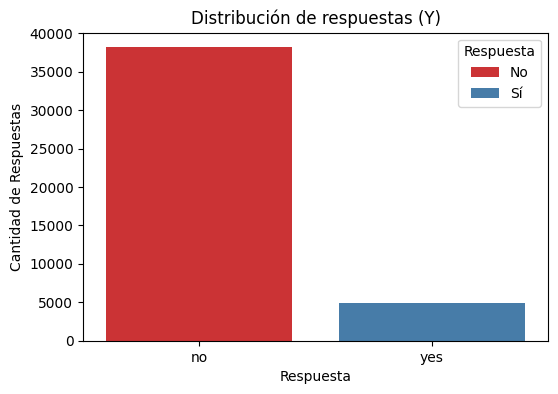

In [77]:
#Distribución: % de clientes que dijeron sí frente a no
plt.figure(figsize=(6,4))   
sns.countplot(data=df1, x='Y', palette='Set1')
plt.title('Distribución de respuestas (Y)')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad de Respuestas')
plt.legend(title='Respuesta', loc='upper right', labels=['No', 'Sí'])
plt.show()


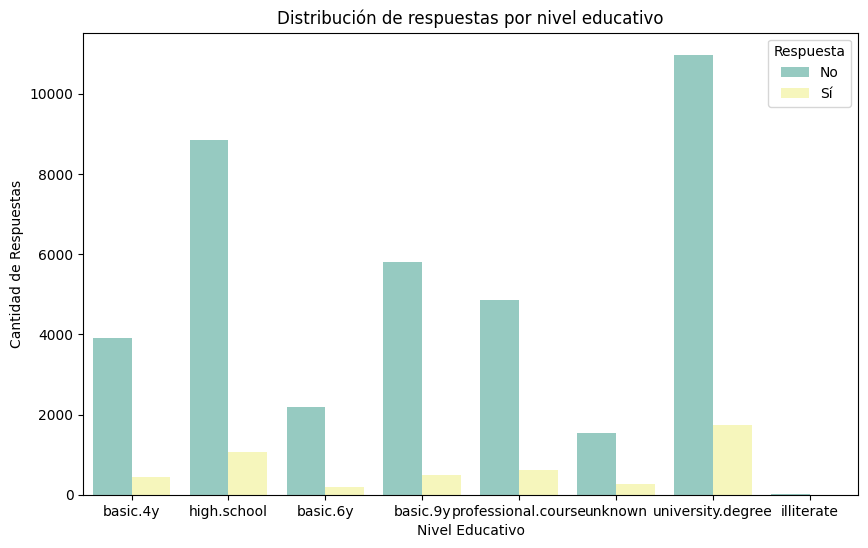

In [76]:
#miro la distribución por nivel educativo
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Education', hue='Y', palette='Set3')
plt.title('Distribución de respuestas por nivel educativo')     
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Respuestas')    
plt.legend(title='Respuesta', loc='upper right', labels=['No', 'Sí'])
plt.show()

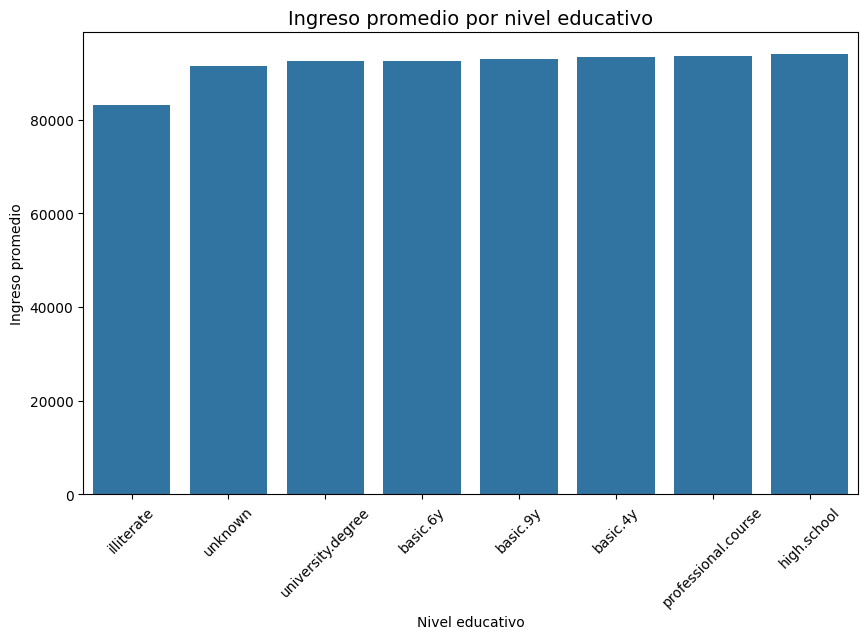

In [67]:


# Agrupamos para calcular la media de Income por nivel educativo
edu_income = df.groupby("Education")["Income"].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=edu_income.index, y=edu_income.values)

plt.title("Ingreso promedio por nivel educativo", fontsize=14)
plt.xlabel("Nivel educativo")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)
plt.show()


C:\Users\Maria\AppData\Local\Temp\ipykernel_13936\268839244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Education", y="Income", palette="Set2")


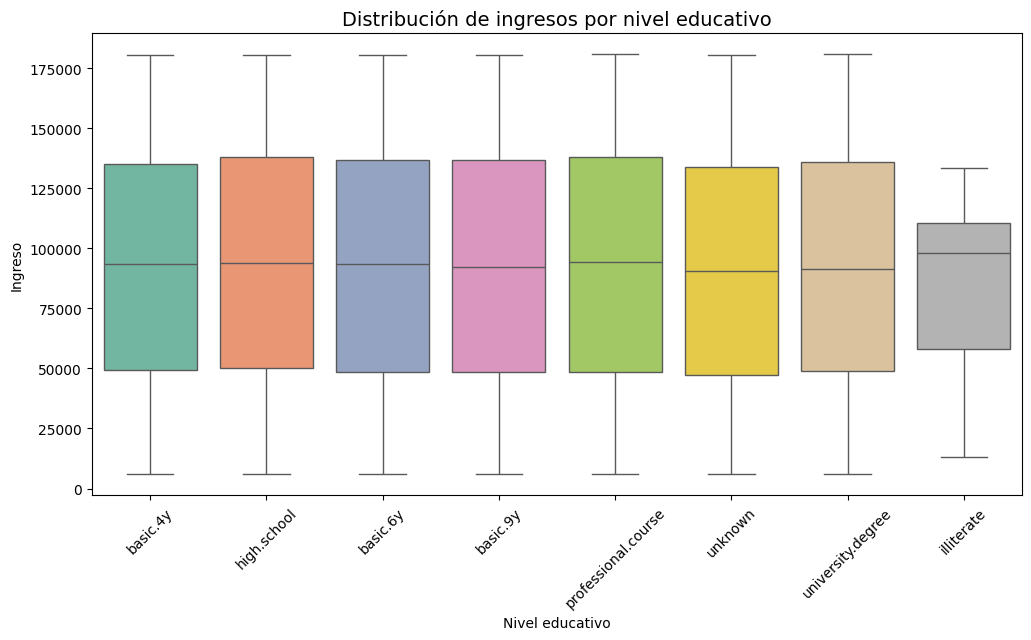

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Education", y="Income", palette="Set2")

plt.title("Distribución de ingresos por nivel educativo", fontsize=14)
plt.xlabel("Nivel educativo")
plt.ylabel("Ingreso")
plt.xticks(rotation=45)
plt.show()


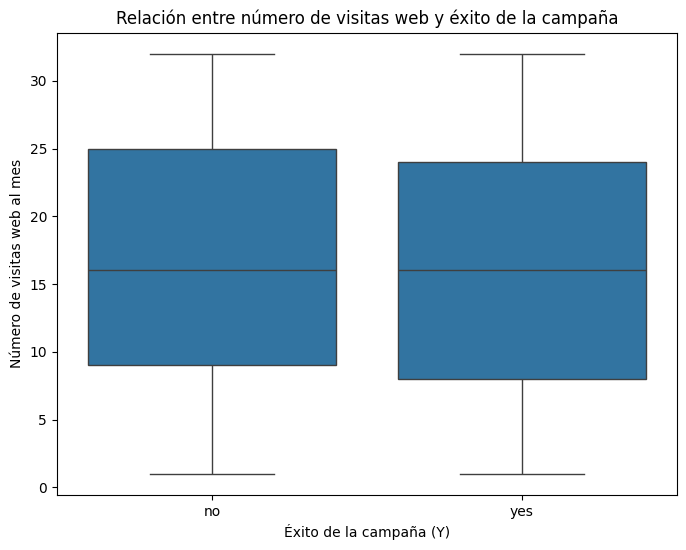

In [69]:
#Hago una relacion entre numero de visitas web y exito de la campaña
plt.figure(figsize=(8,6))   
sns.boxplot(x='Y', y='NumWebVisitsMonth', data=df)
plt.title('Relación entre número de visitas web y éxito de la campaña')
plt.xlabel('Éxito de la campaña (Y)')
plt.ylabel('Número de visitas web al mes')  
plt.show()

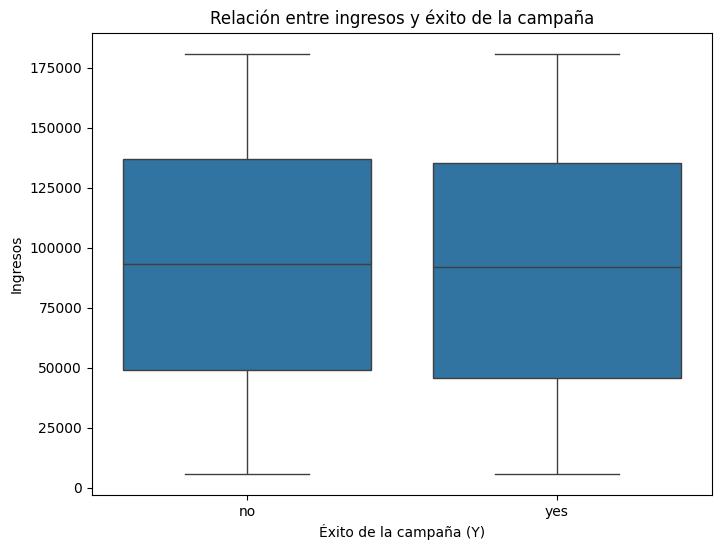

In [70]:
#ahora los ingresos y el exito de la campaña
plt.figure(figsize=(8,6))   
sns.boxplot(x='Y', y='Income', data=df)
plt.title('Relación entre ingresos y éxito de la campaña')
plt.xlabel('Éxito de la campaña (Y)')
plt.ylabel('Ingresos')
plt.show()

In [71]:
df.Contact.unique()

array(['telephone', 'cellular'], dtype=object)

Contact
cellular     14.743028
telephone     5.158934
Name: yes, dtype: float64


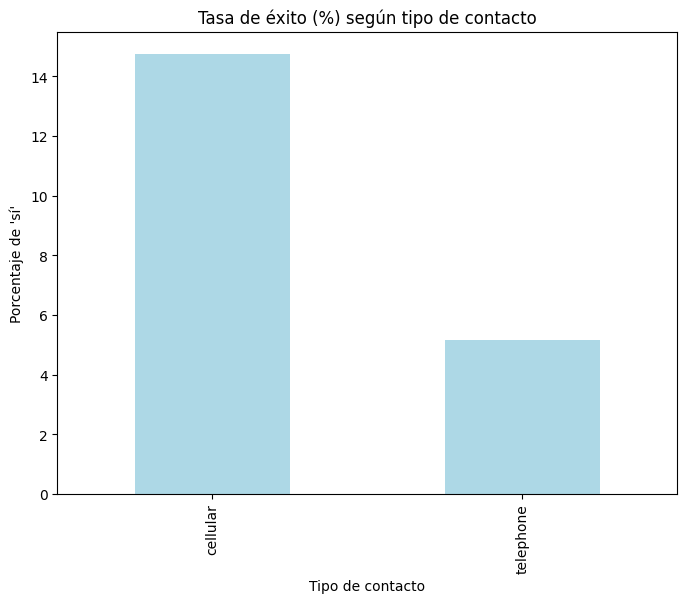

In [72]:
#El porcentaje de exito por tipo de contacto
contact_success_rate = df.groupby('Contact')['Y'].value_counts(normalize=True).unstack()['yes'] * 100
print(contact_success_rate)
#un grafico de barras
plt.figure(figsize=(8,6))   
contact_success_rate.plot(kind='bar', color="lightblue")
plt.title("Tasa de éxito (%) según tipo de contacto")       
plt.xlabel("Tipo de contacto")
plt.ylabel("Porcentaje de 'sí'")    
plt.show()

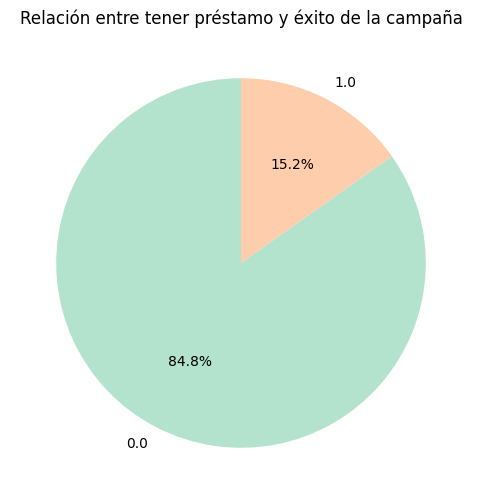

In [73]:
#una relacion entre loan y exito de la campaña
plt.figure(figsize=(8,6))
plt.pie(df['Loan'].value_counts(), labels=df['Loan'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)  
plt.title('Relación entre tener préstamo y éxito de la campaña')
plt.show()

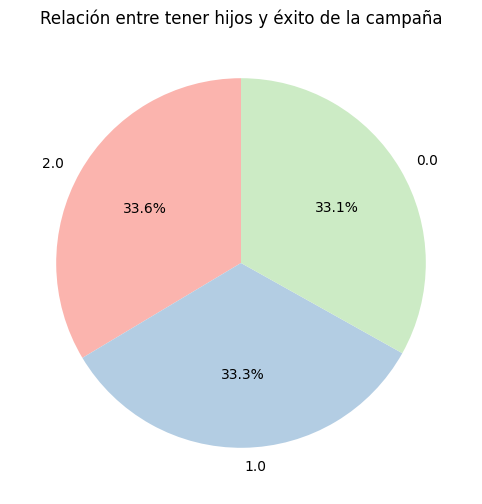

In [74]:
#relacion entre tener hijos y exito de la campaña
plt.figure(figsize=(8,6))   
plt.pie(df['Kidhome'].value_counts(), labels=df['Kidhome'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Relación entre tener hijos y éxito de la campaña')
plt.show()